In [1]:
import random
import pandas as pd

In [2]:
#Grammar rules
# L=a^n b^m c^2n   assuming m>0 , n>0
rules ={
    "a" : ['a', 'b'],
    "b" : ['b','c'],
    "c" : ['c']
}

In [3]:
#Generates random words following a^n b^m c^l
def expand_random(start,stop):
    if len(start) == stop:
        return start
    if (rules[start[-1]] and len(start)<100) :            
        element = random.choice(rules[start[-1]])
        start = start + element
        return expand_random(start,stop)
    


    return start

In [4]:
#Generates random words following a^n b^m c^2n 
def expand_cfg(start,a_count,b_count,c_count):
    if (rules[start[-1]] and len(start)<100 and c_count < 2*a_count) :
        if start[-1] == 'b' and b_count < 10-3*a_count:
            element = 'b'
        elif start[-1] == 'b' and b_count == 100 -3*a_count:
            element ='c'
        else :
            element = random.choice(rules[start[-1]])
        start = start + element
        if element == 'a':
            a_count += 1
        elif element =='c':
            c_count += 1
        elif element =='b':
            b_count += 1

        return expand_cfg(start,a_count,b_count,c_count)


    return start
        
    

In [5]:
def gen_cfg():
    start = 'a'
    a_count = 1
    c_count = 0  
    b_count =0
    return expand_cfg(start,a_count,b_count,c_count)
    
def gen_random():
    start ='a'
    stop = random.randint(10,100)
    return expand_random(start,stop)
    
    
    

In [6]:
dict_list=[]   #words that are/are not in the language are classified as 1/0
for i in range(100000):
    a=[gen_cfg(),1]
    dict_list.append(a)
for i in range(200):    
    b=[gen_random(),0]
    dict_list.append(b)
random.shuffle(dict_list)

In [7]:
df = pd.DataFrame(dict_list, columns=['Words','Class'])

In [8]:
df =df.drop_duplicates(subset=['Words'],ignore_index=True)

<AxesSubplot:ylabel='Frequency'>

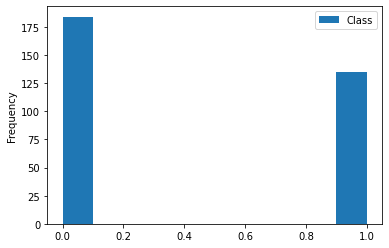

In [9]:
df.plot.hist()

In [10]:
df['Class'].value_counts()

0    184
1    135
Name: Class, dtype: int64

In [11]:
print(df.to_markdown())

|     | Words                                                                                                |   Class |
|----:|:-----------------------------------------------------------------------------------------------------|--------:|
|   0 | abbbbbbbcc                                                                                           |       1 |
|   1 | aabbbbbbbcccc                                                                                        |       1 |
|   2 | aaabbbbcccccc                                                                                        |       1 |
|   3 | aaaabbcccccccc                                                                                       |       1 |
|   4 | aabbbbcccc                                                                                           |       1 |
|   5 | abbbbbbbbcc                                                                                          |       1 |
|   6 | abbbbbbbbbbcc           

In [15]:
df.to_csv('cfg_dataset.csv', encoding='utf-8',header=True,)